In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from thesis.constants import ELD_FREQ, ELD_TEST_LEN
from thesis.dataloading import load_eld_prophet

In [2]:
dfs = load_eld_prophet("datasets/LD2011_2014.txt")

In [3]:
NAME = "MT_008"

In [4]:
df_train, df_test = dfs[NAME]

20:33:10 - cmdstanpy - INFO - Chain [1] start processing
20:33:10 - cmdstanpy - INFO - Chain [1] done processing
/home/konstantinos/miniconda3/envs/thesis/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/konstantinos/miniconda3/envs/thesis/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/konstantinos/miniconda3/envs/thesis/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The beh

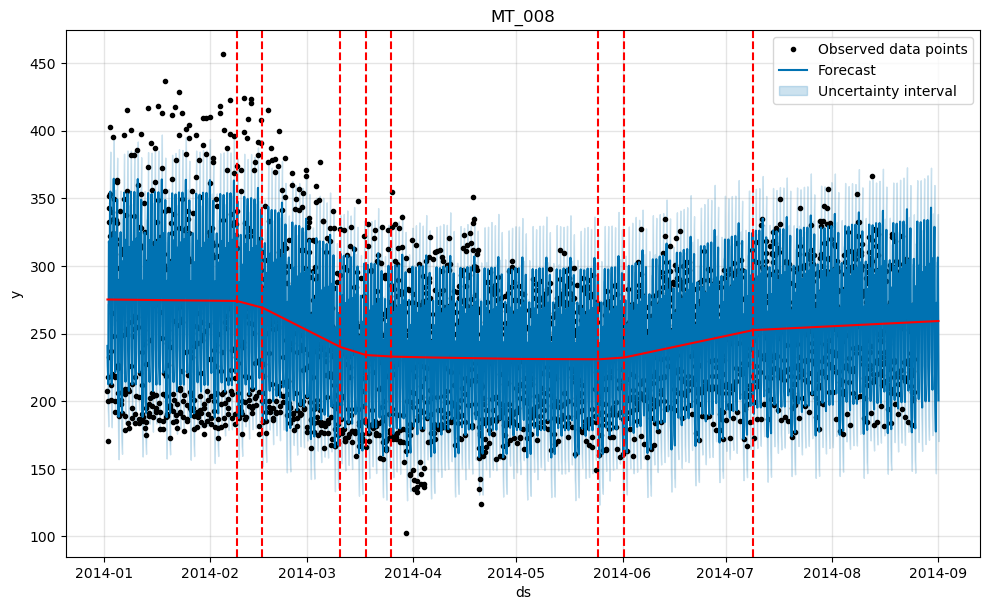

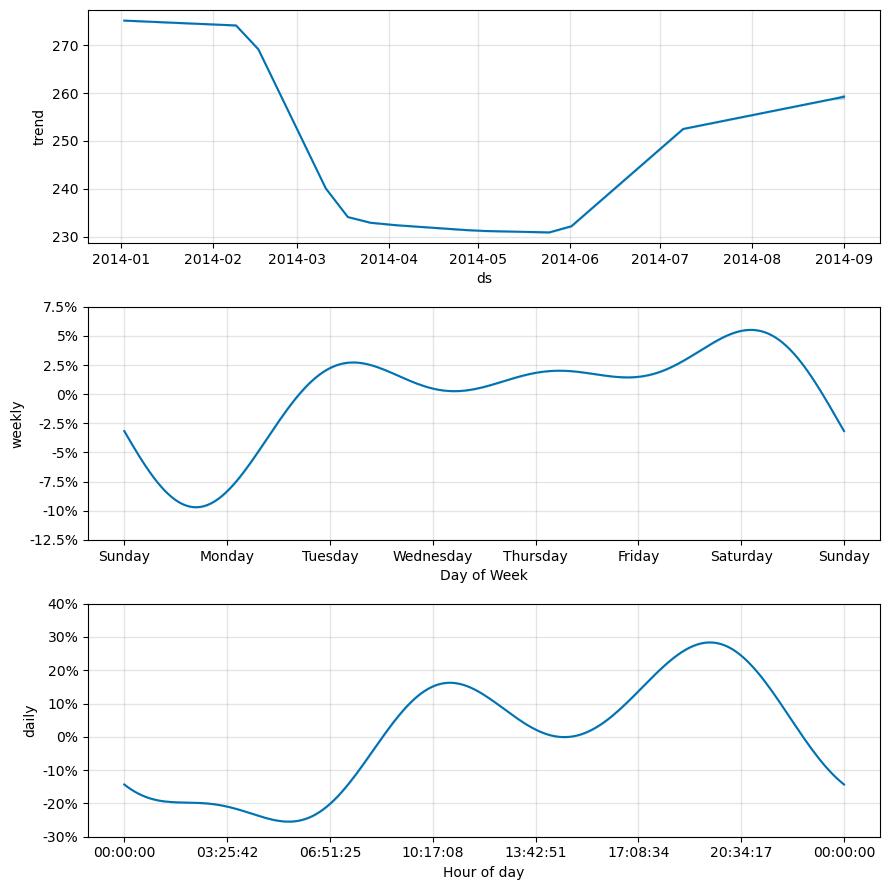

In [8]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=True,  # type: ignore
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=1,
)
model.fit(df_train)
future = model.make_future_dataframe(periods=ELD_TEST_LEN, freq=ELD_FREQ)
forecast = model.predict(future)

fig1 = model.plot(
    forecast, include_legend=True
)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)
fig1.gca().set_title(NAME)

fig2 = model.plot_components(forecast)

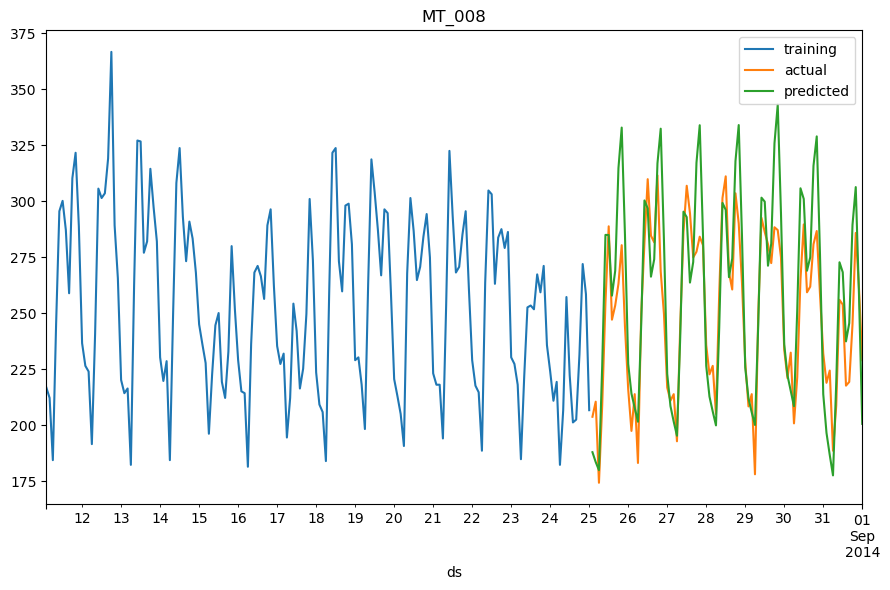

In [36]:
fig = plt.figure(figsize=(9, 6))
df_train.set_index("ds")["y"][-2*ELD_TEST_LEN:].rename("training").plot(legend=True)
df_test.set_index("ds")["y"].rename("actual").plot(legend=True)
forecast.set_index("ds")["yhat"][-ELD_TEST_LEN:].rename("predicted").plot(legend=True)
plt.gca().set_title(NAME)
fig.tight_layout()